In [5]:
import os
import torch
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import segmentation_models_pytorch as smp

from pprint import pprint
from torch.utils.data import DataLoader

from src.dataset import SegmentationDataset

import logging
import os
from typing import Optional, Tuple

import pandas as pd
from pytorch_lightning import LightningDataModule
from torch.utils.data import DataLoader, Dataset
from src.config import DataConfig
from src.dataset import SegmentationDataset
from src.dataset_splitter import split_subsets
from src.augmentations import get_transforms

%load_ext autoreload
%autoreload 2

In [6]:
image = cv2.imread('data\\images\\0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(1333, 1000, 3)

In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

In [5]:
def split_and_save_datasets(data_path: str, train_fraction: float = 0.8):
    df_path = os.path.join(data_path, 'annotations.tsv')
    df_path = os.path.normpath(df_path)
    df = pd.read_csv(df_path, delimiter='\t')
    logging.info(f'Original dataset: {len(df)}')
    df = df.drop_duplicates()
    logging.info(f'Final dataset: {len(df)}')

    train_df, valid_df, test_df = split_subsets(df, train_fraction=train_fraction)
    logging.info(f'Train dataset: {len(train_df)}')
    logging.info(f'Valid dataset: {len(valid_df)}')
    logging.info(f'Test dataset: {len(test_df)}')

    train_df.to_csv(os.path.join(data_path, 'df_train.csv'), index=False)
    valid_df.to_csv(os.path.join(data_path, 'df_valid.csv'), index=False)
    test_df.to_csv(os.path.join(data_path, 'df_test.csv'), index=False)
    logging.info('Datasets successfully saved!')
    return train_df, valid_df, test_df


In [29]:
train_df.shape, valid_df.shape, test_df.shape

((385, 6), (49, 6), (48, 6))

In [8]:
# Example usage
image_directory = "C:\\Users\\julia\\CV\\01-SEGMENTATION\\data"

train_transforms = get_transforms(width=320, height=320, encoder = 'resnet34')
valid_transforms = get_transforms(width=320, height=320, encoder = 'resnet34', augmentations=False)
test_transforms = get_transforms(width=320, height=320, encoder = 'resnet34', augmentations=False)

train_df, valid_df, test_df = split_and_save_datasets(image_directory)

train_dataset = SegmentationDataset(
    train_df,
    image_folder=image_directory,
    transforms=train_transforms)

valid_dataset = SegmentationDataset(
    valid_df,
    image_folder=image_directory,
    transforms=valid_transforms
)

test_dataset = SegmentationDataset(
    test_df,
    image_folder=image_directory,
    transforms=test_transforms
)

In [26]:
# image_directory = 'C:/Users/julia/CV/01-SEGMENTATION/data'
# dataframe = pd.read_csv('data/annotations.tsv', sep='\t')
# image_path = os.path.join(image_directory, dataframe['filename'].iloc[0])
# image_path = os.path.normpath(image_path)
# image_path
# # Check if the file exists
# if not os.path.exists(image_path):
#     print("The file does not exist at the specified path.")
# else:
#     image = cv2.imread(image_path)
#     if image is None:
#         print("Failed to load the image.")
#     else:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         print("Image size:", image.shape[:2])

Image size: (1333, 1000)


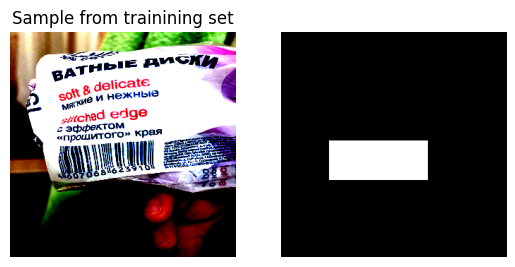

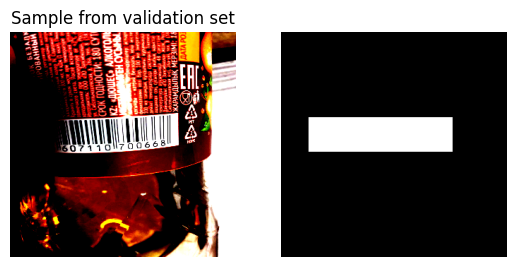

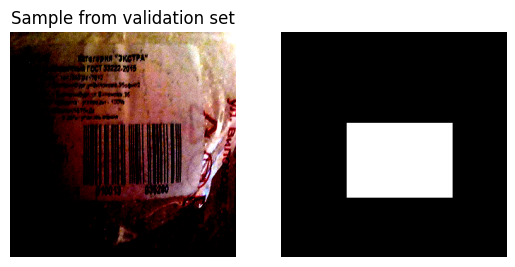

In [12]:
import matplotlib.pyplot as plt
import random

sample_img = train_dataset[random.choice(range(len(train_dataset)))]
sample_img['image'] = sample_img['image'].permute(1, 2, 0)
plt.subplot(1,2,1)
plt.title("Sample from trainining set")
plt.axis("off")
plt.imshow(sample_img['image'].squeeze())
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(sample_img['mask'].squeeze(), cmap='gray')
plt.show()

sample_img = valid_dataset[random.choice(range(len(valid_dataset)))]
sample_img['image'] = sample_img['image'].permute(1, 2, 0)
plt.subplot(1,2,1)
plt.title("Sample from validation set")
plt.axis("off")
plt.imshow(sample_img['image'].squeeze())
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(sample_img['mask'].squeeze(), cmap='gray')
plt.show()

sample_img = valid_dataset[random.choice(range(len(test_dataset)))]
sample_img['image'] = sample_img['image'].permute(1, 2, 0)
plt.subplot(1,2,1)
plt.title("Sample from validation set")
plt.axis("off")
plt.imshow(sample_img['image'].squeeze())
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(sample_img['mask'].squeeze(), cmap='gray')
plt.show()

In [3]:

# Specify encoder and its pretrained weights
ENCODER = 'resnet34'
ENCODER_WEIGHTS = 'imagenet'

# Get the preprocessing function
preprocess_input = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

# Print the type of the preprocessing function
print(type(preprocess_input))

<class 'functools.partial'>
